<a href="https://colab.research.google.com/github/MickaWilk/Simplon_Projects/blob/main/Pr%C3%A9sentation_R%C3%A9gression_Logistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [295]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
import scipy.stats as ss
import itertools
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,cross_val_score

In [296]:
import os
path = os.getcwd()

In [297]:
data = pd.read_csv(path + "/sample_data/water_potability.csv")
data.drop_duplicates(inplace=True)

In [298]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [299]:
#data["Potability"].value_counts()
data.groupby("Potability").size()

Potability
0    1998
1    1278
dtype: int64

In [300]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


In [302]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [303]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [304]:
data.loc[:,"Potability"] = data.loc[:,"Potability"].round(0).map({0: "Non-potable", 1: "Potable"})
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,Non-potable
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,Non-potable
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,Non-potable
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,Non-potable
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,Non-potable
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,Potable
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,Potable
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,Potable
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,Potable


In [305]:
data.groupby('Potability').size()

Potability
Non-potable    1998
Potable        1278
dtype: int64

ph                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Hardness           AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Solids             AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Chloramines           AxesSubplot(0.125,0.391471;0.227941x0.222059)
Sulfate            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Conductivity       AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Organic_carbon           AxesSubplot(0.125,0.125;0.227941x0.222059)
Trihalomethanes       AxesSubplot(0.398529,0.125;0.227941x0.222059)
Turbidity             AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

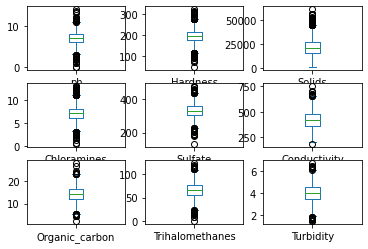

In [306]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

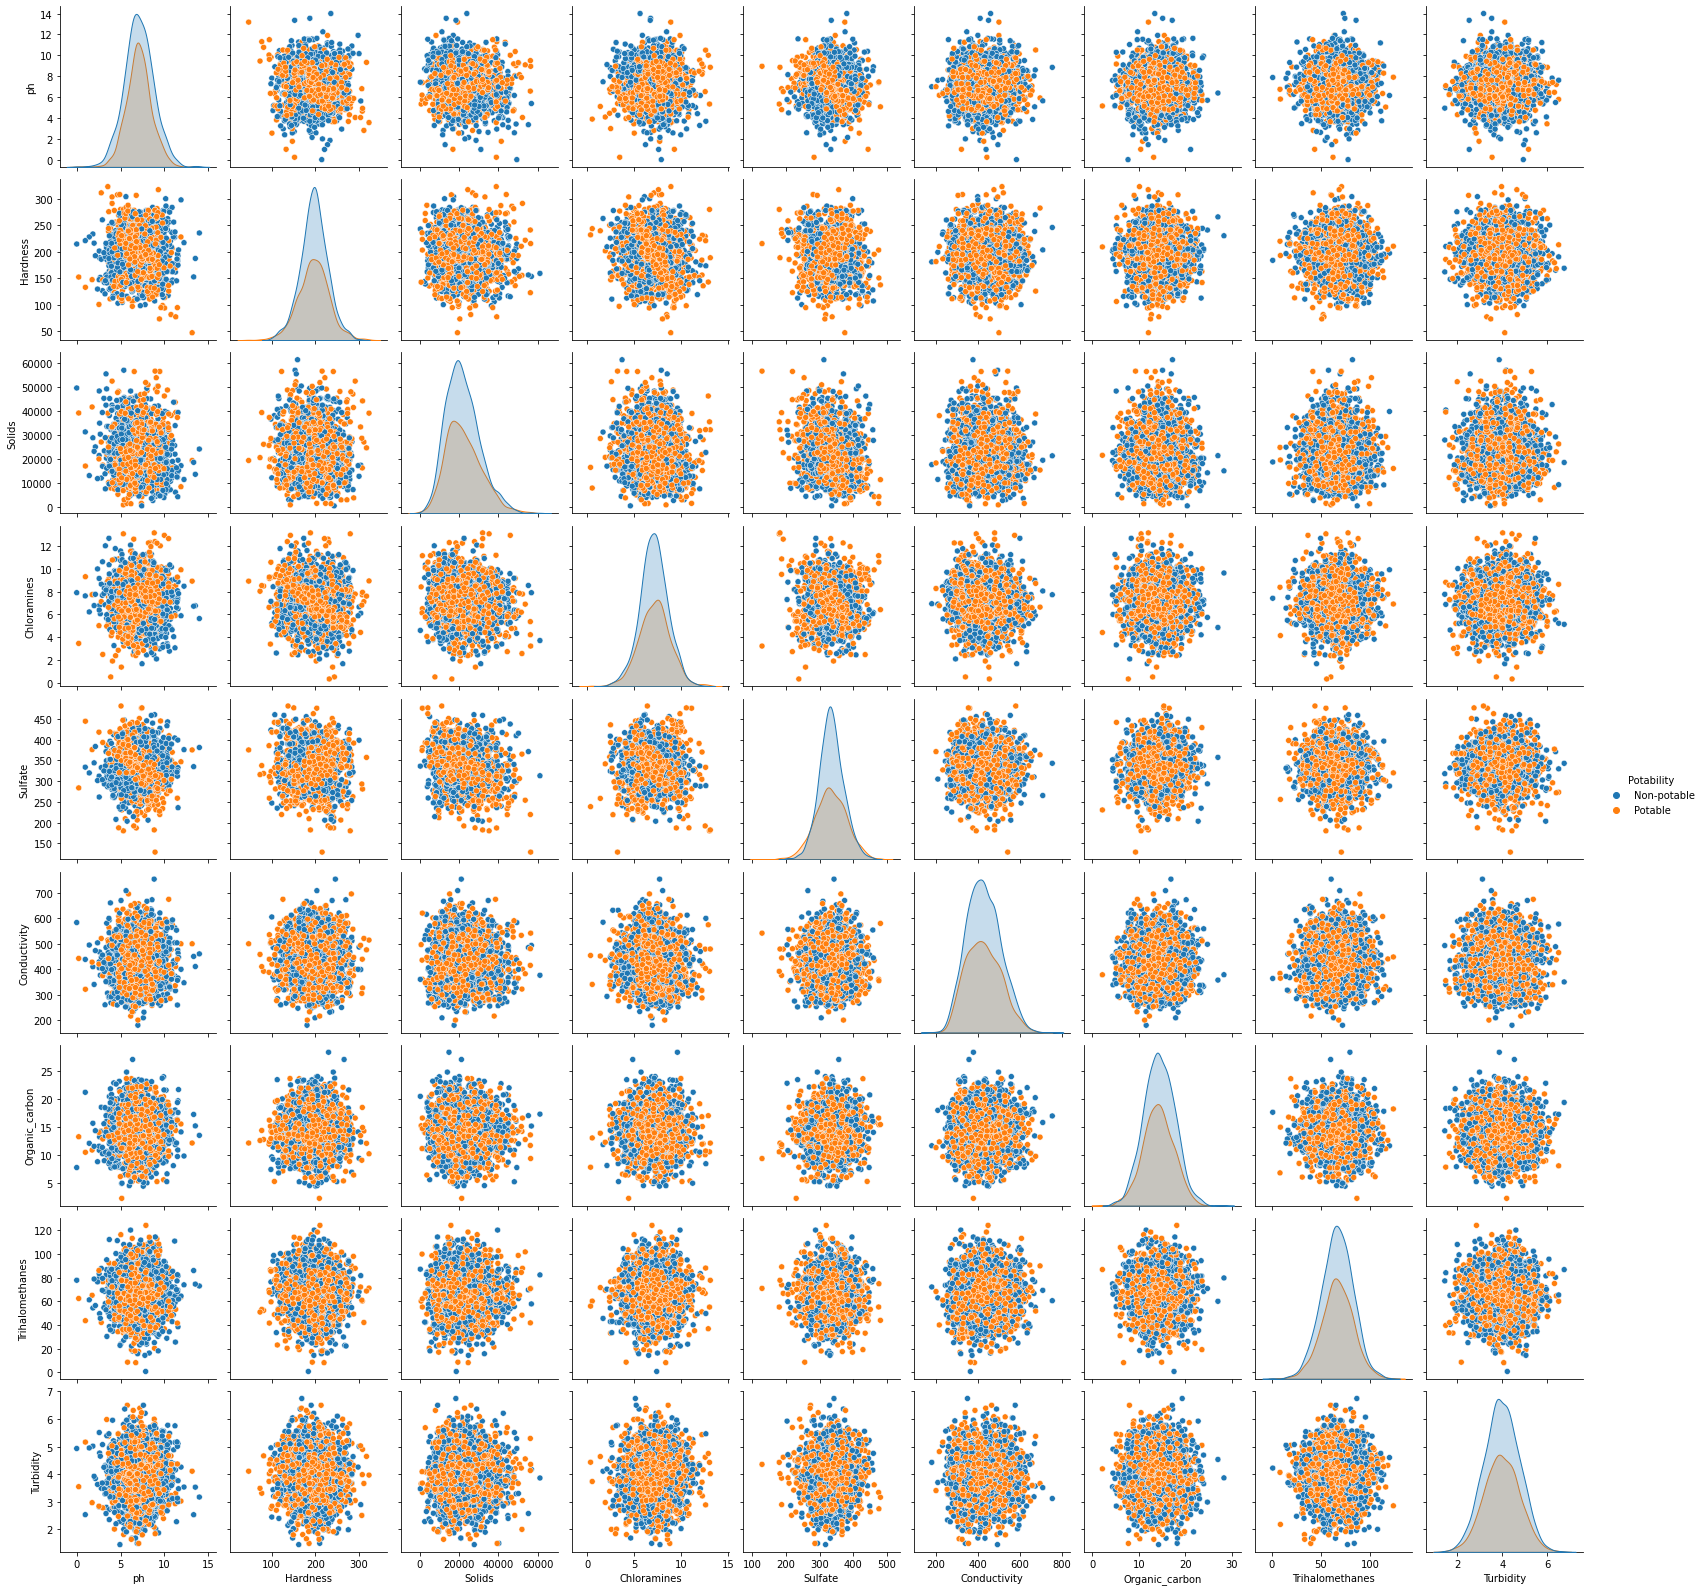

In [307]:
import seaborn as sns
sns.pairplot(data, hue="Potability")

In [308]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")

X = data.drop("Potability", axis = 1)
y = data["Potability"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

num_selector = make_column_selector(dtype_include=["float64", "int64"])
num_processor = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("standard", StandardScaler()) 
])

preprocessor = make_column_transformer(
    (num_processor, num_selector))
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('standard',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9566240280>)])

In [309]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=50, solver="liblinear"))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('standard',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9566240280>)])),
                ('logisticregression',
                 LogisticRegression(max_iter=50, solver='liblinear'))])

In [310]:
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.6051829268292683

In [311]:
cross_val_score(model, X_train, y_train).mean()


0.6129770992366412

In [312]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('standard',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9566240280>)])),
                ('logisticregression',
                 LogisticRegression(max_iter=50, solver='liblinear'))])

In [313]:
solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
epochs = [50,100,400,500,1000]
params = {"max_iter":epochs,"solver":solvers}
params_dict = {"columntransformer__pipeline__imputer__strategy" : ["median", "mean", "constant", "most_frequent"],
               "logisticregression__solver": solvers,
               "logisticregression__max_iter": epochs }

model
grid = GridSearchCV(model, param_grid=params_dict, cv=5).fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)


{'columntransformer__pipeline__imputer__strategy': 'median', 'logisticregression__max_iter': 50, 'logisticregression__solver': 'liblinear'}
0.6129770992366412


In [314]:
from sklearn.metrics import mean_squared_error
y_pred = pd.DataFrame(model.predict(X_test))
reel = pd.DataFrame(y_test).reset_index().drop(columns = ["index"], axis = 1)
diff = pd.concat([reel, y_pred, X_test.fillna(X_test.median()).reset_index()], axis = 1).rename(columns={0:"Pred"})
y_pred.value_counts()



Non-potable    654
Potable          2
dtype: int64

In [315]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(reel, y_pred)
confusion_matrix

array([[396,   1],
       [258,   1]])

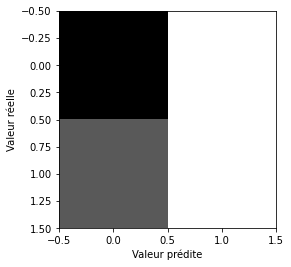

In [316]:
plt.imshow(confusion_matrix, cmap='binary')
plt.xlabel("Valeur prédite")
plt.ylabel("Valeur réelle")
plt.show()

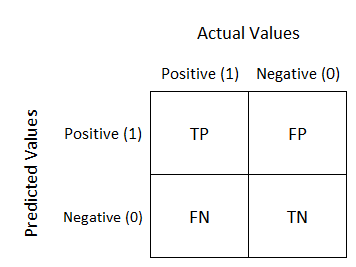

In [317]:
from sklearn.metrics import classification_report
print(classification_report(reel, y_pred))

              precision    recall  f1-score   support

 Non-potable       0.61      1.00      0.75       397
     Potable       0.50      0.00      0.01       259

    accuracy                           0.61       656
   macro avg       0.55      0.50      0.38       656
weighted avg       0.56      0.61      0.46       656

